1. Carga de datos y librerias

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [164]:
# Cargar el dataset
df = pd.read_csv("../../data/youtoxic_english_1000.csv", encoding="utf-8")
print("Dataset cargado exitosamente!")
print(f"Forma del dataset: {df.shape}")
df.head()
df.info()
df.describe()

Dataset cargado exitosamente!
Forma del dataset: (1000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [165]:
#revisar datos faltantes
df.isnull().sum()


CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

2. Limpieza de datos

In [166]:
print("\n" + "=" * 60)
print("2️⃣ LIMPIEZA DE DATOS")
print("=" * 60)

# Tamaño inicial
print(f"Dataset original: {len(df)} filas")

# 1. Eliminar nulos
nulls = df["Text"].isnull().sum()
print("Textos nulos:", nulls)

df = df.dropna(subset=["Text"])
print("Después de eliminar vacíos:", len(df))

# 2. Eliminar duplicados
dupes = df["Text"].duplicated().sum()
print("Textos duplicados:", dupes)

df = df.drop_duplicates(subset=["Text"])
print("Después de eliminar duplicados:", len(df))

print("\n✅ Dataset limpio:", len(df))


2️⃣ LIMPIEZA DE DATOS
Dataset original: 1000 filas
Textos nulos: 0
Después de eliminar vacíos: 1000
Textos duplicados: 3
Después de eliminar duplicados: 997

✅ Dataset limpio: 997


3️⃣ ANÁLISIS DE ETIQUETAS


3️⃣ ANÁLISIS DE ETIQUETAS

DISTRIBUCIÓN POR CATEGORÍA:
IsToxic                459 ( 46.0%) | Ratio:    1.2:1
IsAbusive              350 ( 35.1%) | Ratio:    1.8:1
IsThreat                21 (  2.1%) | Ratio:   46.5:1
IsProvocative          158 ( 15.8%) | Ratio:    5.3:1
IsObscene              100 ( 10.0%) | Ratio:    9.0:1
IsHatespeech           138 ( 13.8%) | Ratio:    6.2:1
IsRacist               125 ( 12.5%) | Ratio:    7.0:1
IsNationalist            8 (  0.8%) | Ratio:  123.6:1
IsSexist                 1 (  0.1%) | Ratio:  996.0:1
IsHomophobic             0 (  0.0%) | Ratio:    inf:1
IsReligiousHate         12 (  1.2%) | Ratio:   82.1:1
IsRadicalism             0 (  0.0%) | Ratio:    inf:1

Comentarios sin etiquetas: 538
Comentarios con 1 etiqueta: 0
Comentarios con 2+ etiquetas: 459
Máximo de etiquetas: 6


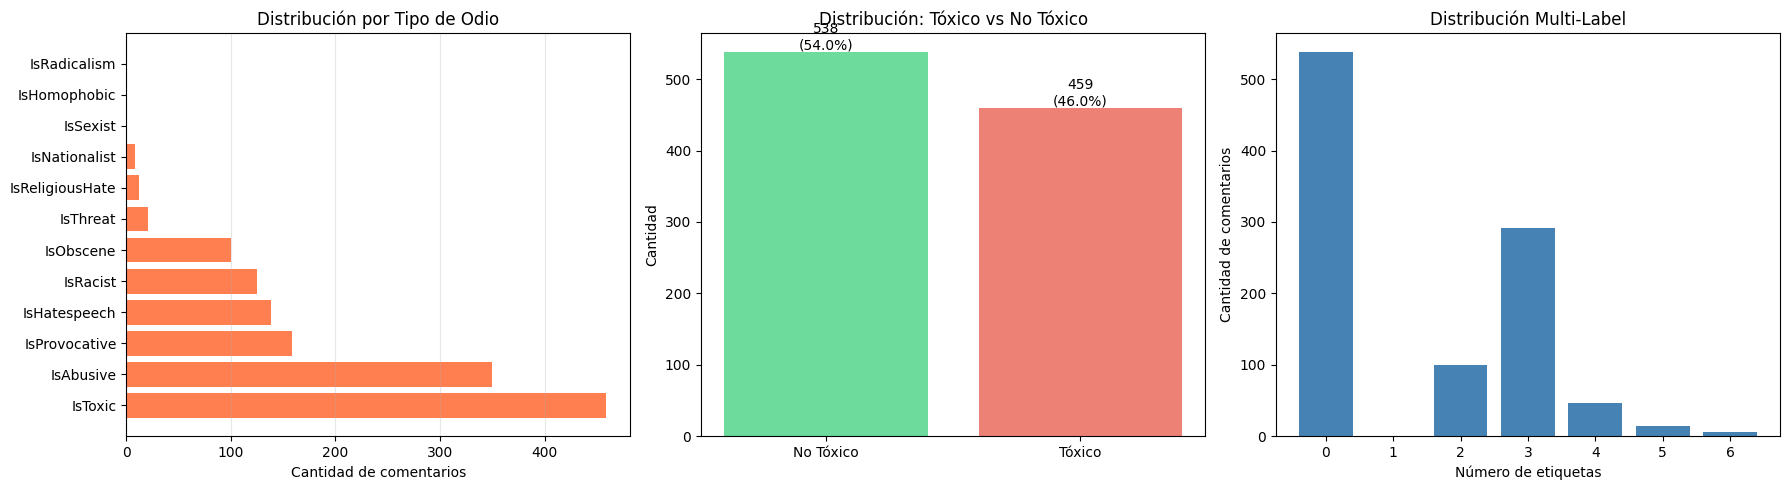

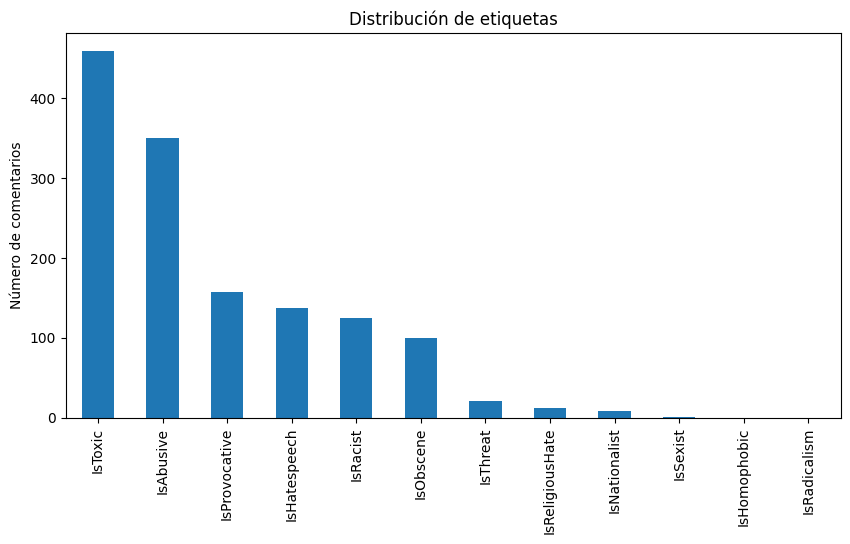

In [167]:
print("\n" + "=" * 60)
print("3️⃣ ANÁLISIS DE ETIQUETAS")
print("=" * 60)

# Definir columnas de etiquetas
label_cols = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 
              'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 
              'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

# 3.1 Distribución de cada etiqueta
print("\nDISTRIBUCIÓN POR CATEGORÍA:")
label_stats = {}
for col in label_cols:
    count = df[col].sum()
    pct = (count / len(df)) * 100
    ratio = (len(df) - count) / count if count > 0 else float('inf')
    label_stats[col] = {'count': count, 'pct': pct, 'ratio': ratio}
    print(f"{col:20} {count:5} ({pct:5.1f}%) | Ratio: {ratio:6.1f}:1")

# 3.2 Multi-label analysis
df['num_labels'] = df[label_cols].sum(axis=1)
print(f"\nComentarios sin etiquetas: {(df['num_labels']==0).sum()}")
print(f"Comentarios con 1 etiqueta: {(df['num_labels']==1).sum()}")
print(f"Comentarios con 2+ etiquetas: {(df['num_labels']>=2).sum()}")
print(f"Máximo de etiquetas: {df['num_labels'].max()}")

# 3.3 Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de categorías
label_counts = df[label_cols].sum().sort_values(ascending=False)
axes[0].barh(label_counts.index, label_counts.values, color='coral')
axes[0].set_xlabel('Cantidad de comentarios')
axes[0].set_title('Distribución por Tipo de Odio')
axes[0].grid(axis='x', alpha=0.3)

# IsToxic
toxic_counts = df['IsToxic'].value_counts()
axes[1].bar(['No Tóxico', 'Tóxico'], toxic_counts.values, 
            color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[1].set_ylabel('Cantidad')
axes[1].set_title('Distribución: Tóxico vs No Tóxico')
for i, v in enumerate(toxic_counts.values):
    axes[1].text(i, v, f'{v}\n({v/len(df)*100:.1f}%)', ha='center', va='bottom')

# Multi-label
label_distribution = df['num_labels'].value_counts().sort_index()
axes[2].bar(label_distribution.index, label_distribution.values, color='steelblue')
axes[2].set_xlabel('Número de etiquetas')
axes[2].set_ylabel('Cantidad de comentarios')
axes[2].set_title('Distribución Multi-Label')

plt.tight_layout()
plt.show()
df[label_cols].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Distribución de etiquetas")
plt.ylabel("Número de comentarios")
plt.show()

4: ANÁLISIS DEL TEXTO CRUDO 📝

In [168]:
print("\n" + "=" * 60)
print("4️⃣ ANÁLISIS DEL TEXTO ORIGINAL")
print("=" * 60)


4️⃣ ANÁLISIS DEL TEXTO ORIGINAL


In [169]:
# 4.1 Longitud de caracteres
df['char_length'] = df['Text'].str.len()
print("\nLongitud en caracteres:")
print(df['char_length'].describe())


Longitud en caracteres:
count     997.000000
mean      186.073220
std       271.022372
min         3.000000
25%        47.000000
50%       102.000000
75%       217.000000
max      4421.000000
Name: char_length, dtype: float64


In [170]:
# 4.2 Longitud en palabras
df['word_count'] = df['Text'].str.split().str.len()
print("\nLongitud en palabras:")
print(df['word_count'].describe())



Longitud en palabras:
count    997.000000
mean      33.868606
std       49.114220
min        1.000000
25%        9.000000
50%       19.000000
75%       39.000000
max      815.000000
Name: word_count, dtype: float64


In [171]:

# 4.3 Detección de patrones
df['has_urls'] = df['Text'].str.contains(r'http|www', case=False, na=False)
df['has_mentions'] = df['Text'].str.contains(r'@\w+', na=False)
df['has_hashtags'] = df['Text'].str.contains(r'#\w+', na=False)
df['uppercase_ratio'] = df['Text'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0
)
df['exclamation_count'] = df['Text'].str.count('!')
df['question_count'] = df['Text'].str.count(r'\?')

print(f"\nComentarios con URLs: {df['has_urls'].sum()}")
print(f"Comentarios con menciones: {df['has_mentions'].sum()}")
print(f"Comentarios con hashtags: {df['has_hashtags'].sum()}")
print(f"Comentarios con >50% mayúsculas: {(df['uppercase_ratio']>0.5).sum()}")
print(f"Comentarios con 3+ exclamaciones: {(df['exclamation_count']>=3).sum()}")





Comentarios con URLs: 13
Comentarios con menciones: 5
Comentarios con hashtags: 9
Comentarios con >50% mayúsculas: 18
Comentarios con 3+ exclamaciones: 44


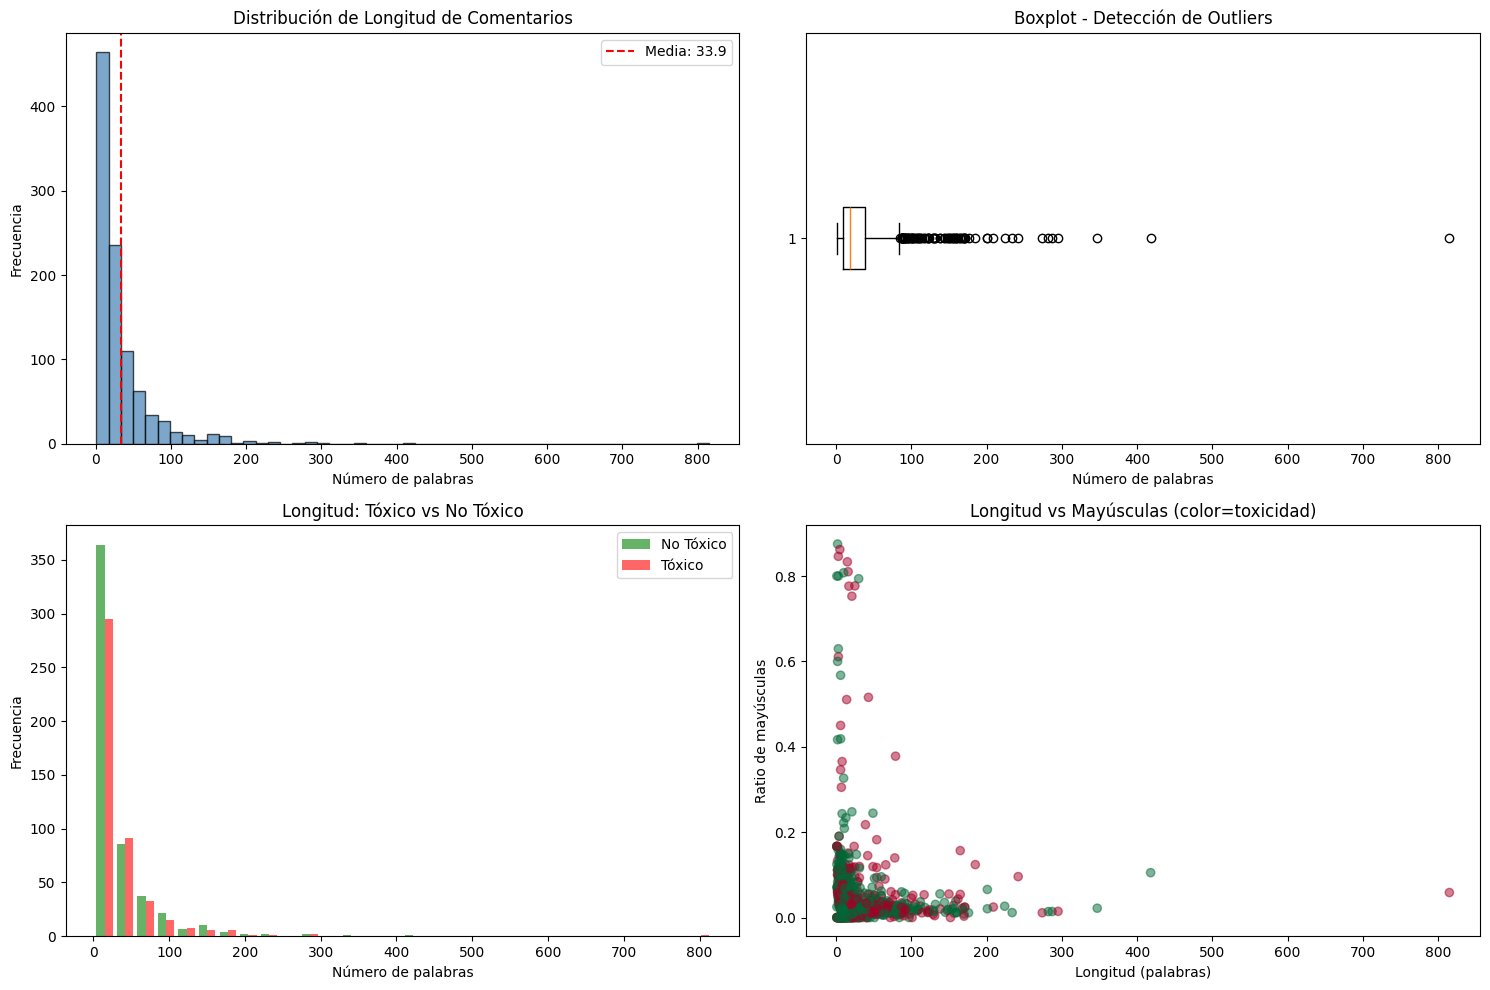

In [172]:


# 4.4 Visualización
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribución de longitud
axes[0,0].hist(df['word_count'], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0,0].axvline(df['word_count'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["word_count"].mean():.1f}')
axes[0,0].set_xlabel('Número de palabras')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_title('Distribución de Longitud de Comentarios')
axes[0,0].legend()



# Boxplot
axes[0,1].boxplot(df['word_count'], vert=False)
axes[0,1].set_xlabel('Número de palabras')
axes[0,1].set_title('Boxplot - Detección de Outliers')



# Longitud por toxicidad
toxic_lengths = df[df['IsToxic']==1]['word_count']
nontoxic_lengths = df[df['IsToxic']==0]['word_count']
axes[1,0].hist([nontoxic_lengths, toxic_lengths], bins=30, 
               label=['No Tóxico', 'Tóxico'], color=['green', 'red'], alpha=0.6)
axes[1,0].set_xlabel('Número de palabras')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Longitud: Tóxico vs No Tóxico')
axes[1,0].legend()

# Ratio de mayúsculas vs toxicidad
axes[1,1].scatter(df['word_count'], df['uppercase_ratio'], 
                  c=df['IsToxic'], cmap='RdYlGn_r', alpha=0.5)
axes[1,1].set_xlabel('Longitud (palabras)')
axes[1,1].set_ylabel('Ratio de mayúsculas')
axes[1,1].set_title('Longitud vs Mayúsculas (color=toxicidad)')

plt.tight_layout()
plt.show()

In [173]:






# 4.5 Ejemplos de textos extremos
print("\n📌 EJEMPLOS DE TEXTOS EXTREMOS:")
print("\nTextos muy cortos (≤3 palabras):")
short = df[df['word_count'] <= 3]['Text'].head(5)
for i, text in enumerate(short, 1):
    print(f"{i}. {text}")

print("\nTextos muy largos (top 3):")
long = df.nlargest(3, 'word_count')[['Text', 'word_count']]
for idx, row in long.iterrows():
    print(f"- ({row['word_count']} palabras): {row['Text'][:100]}...")


📌 EJEMPLOS DE TEXTOS EXTREMOS:

Textos muy cortos (≤3 palabras):
1. 1 word: Provocateur........
2. I LIKE TURTLES!
3. Wow!!!
4. Well done 👍
5. CHRISTIANS ROCK!

Textos muy largos (top 3):
- (815 palabras): THE UGLY TRUTH:

If you talk like a THUG, act like a THUG, walk like a THUG, and live like a THUG......
- (418 palabras): *WHAT DOES TRAYVON MARTIN AND MICHAEL BROWN HAVE IN COMMON?*  
*THE REAL REASON BEHIND THE RIOTS THA...
- (347 palabras): Thank you. Finally, a powerful voice for the truth from the black community. 93% of black killings a...


In [174]:
print("\n" + "=" * 60)
print("🔍 VERIFICACIÓN DE COLUMNAS CON TODOS FALSE")
print("=" * 60)

label_cols = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 
              'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 
              'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

all_false_cols = []

for col in label_cols:
    false_count = (df[col] == 0).sum()
    total_count = len(df)
    is_all_false = false_count == total_count
    
    if is_all_false:
        all_false_cols.append(col)
        print(f"⚠️  {col}: TODO FALSE ({false_count}/{total_count})")
    else:
        true_count = (df[col] == 1).sum()
        print(f"✅ {col}: {true_count} True, {false_count} False")

if all_false_cols:
    print(f"\n🚨 Columnas completamente FALSE: {all_false_cols}")
else:
    print(f"\n✅ Ninguna columna tiene todos los valores en False")
    
    # Eliminar columnas con todos False y muy desvalanceadas
    cols_to_drop = ["IsHomophobic", "IsRadicalism", "IsSexist"]
    df = df.drop(columns=cols_to_drop, errors="ignore")
    
    
    
df.head()
 




🔍 VERIFICACIÓN DE COLUMNAS CON TODOS FALSE
✅ IsToxic: 459 True, 538 False
✅ IsAbusive: 350 True, 647 False
✅ IsThreat: 21 True, 976 False
✅ IsProvocative: 158 True, 839 False
✅ IsObscene: 100 True, 897 False
✅ IsHatespeech: 138 True, 859 False
✅ IsRacist: 125 True, 872 False
✅ IsNationalist: 8 True, 989 False
✅ IsSexist: 1 True, 996 False
⚠️  IsHomophobic: TODO FALSE (997/997)
✅ IsReligiousHate: 12 True, 985 False
⚠️  IsRadicalism: TODO FALSE (997/997)

🚨 Columnas completamente FALSE: ['IsHomophobic', 'IsRadicalism']


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,...,IsRadicalism,num_labels,char_length,word_count,has_urls,has_mentions,has_hashtags,uppercase_ratio,exclamation_count,question_count
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,...,False,0,1558,287,False,False,False,0.014121,0,1
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,...,False,2,138,25,False,False,False,0.036232,0,0
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,...,False,3,420,77,False,False,False,0.002381,0,0
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,...,False,0,582,107,False,False,False,0.015464,0,0
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,...,False,0,243,47,False,False,False,0.020576,0,1


5. Guardado del EDA

In [175]:
# Guardar el dataset limpio después del EDA
eda_file = "../../data/processed_eda/dataset_eda.csv"
eda_pkl_file = "../../data/processed_eda/dataset_eda.pkl"

# Guardar dataset en Pickle
df.to_pickle(eda_pkl_file)

df.to_csv(eda_file, index=False)
print(f"✅ Dataset guardado después del EDA en: {eda_file}")
print(f"✅ Dataset guardado después del EDA en PKL: {eda_pkl_file}")



✅ Dataset guardado después del EDA en: ../../data/processed_eda/dataset_eda.csv
✅ Dataset guardado después del EDA en PKL: ../../data/processed_eda/dataset_eda.pkl
